Sebastian Raschka, 2014-2016  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/_ipynb_templates/regressor/linear_regression.ipynb)

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p mlxtend,matplotlib,numpy,scipy

Sebastian Raschka 
last updated: 2016-06-26 

CPython 3.5.1
IPython 4.2.0

mlxtend 0.4.2.dev0
matplotlib 1.5.1
numpy 1.11.0
scipy 0.17.1


In [2]:
%matplotlib inline

# Adaptive Linear Neuron -- Adaline

An implementation of the ADAptive LInear NEuron, Adaline, for binary classification tasks.

> from mlxtend.classifier import Adaline

## Overview

An illustration of the ADAptive LInear NEuron (Adaline) -- a single-layer artificial linear neuron with a threshold unit:
    
![](./Adaline_files/adaline_schematic.png)

The Adaline classifier is closely related to the Ordinary Least Squares (OLS) Linear Regression algorithm; in OLS regression we find the line (or hyperplane) that minimizes the vertical offsets. Or in other words, we define the best-fitting line as the line that minimizes the sum of squared errors (SSE) or mean squared error (MSE) between our target variable (y) and our predicted output over all samples $i$ in our dataset of size $n$.

$$ SSE =  \sum_i (\text{target}^{(i)} - \text{output}^{(i)})^2$$

$$MSE = \frac{1}{n} \times SSE$$


[`LinearRegression`](../regressor/LinearRegression.md) implements a linear regression model for performing ordinary least squares regression, and in Adaline, we add a threshold function $g(\cdot)$ to convert the continuous outcome to a categorical class label:

$$y = g({z}) =
\begin{cases}
1 & \text{if z $\ge$ 0}\\
-1 & \text{otherwise}.
\end{cases}
$$

An Adaline model can be trained by one of the following three approaches:

- Normal Equations
- Gradient Descent
- Stochastic Gradient Descent

### Normal Equations (closed-form solution)

The closed-form solution should be preferred for "smaller" datasets where calculating (a "costly") matrix inverse is not a concern. For very large datasets, or datasets where the inverse of $[X^T X]$ may not exist (the matrix is non-invertible or singular, e.g., in case of perfect multicollinearity), the gradient descent or stochastic gradient descent approaches are to be preferred.

The linear function (linear regression model) is defined as:

$$z = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum_{j=0}^{m} w_j x_j = \mathbf{w}^T\mathbf{x}$$

where $y$ is the response variable, $\mathbf{x}$ is an $m$-dimensional sample vector, and $\mathbf{w}$ is the weight vector (vector of coefficients). Note that $w_0$ represents the y-axis intercept of the model and therefore $x_0=1$.  

Using the closed-form solution (normal equation), we compute the weights of the model as follows:

$$ \mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^Ty$$

### Gradient Descent (GD)  and Stochastic Gradient Descent (SGD) 

In the current implementation, the Adaline model is learned via Gradient Descent or Stochastic Gradient Descent.

See [Gradient Descent and Stochastic Gradient Descent](../general_concepts/gradient-optimization.md) and [Deriving the Gradient Descent Rule for Linear Regression and Adaline](../general_concepts/linear-gradient-derivative.md) for details.

Random shuffling is implemented as:

- for one or more epochs
    - randomly shuffle samples in the training set
        - for training sample *i*
            - compute gradients and perform weight updates

### References


- B. Widrow, M. E. Hoff, et al. [Adaptive switching circuits](http://www.rob.uni-luebeck.de/index.php?id=267). 1960.

## Examples

### Example 1 - Closed Form Solution

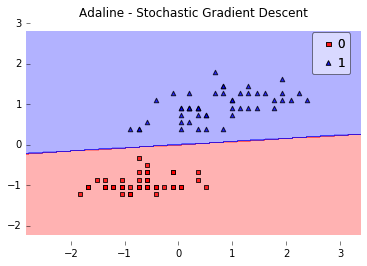

In [3]:
from mlxtend.data import iris_data
from mlxtend.evaluate import plot_decision_regions
from mlxtend.classifier import Adaline
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width
X = X[0:100] # class 0 and class 1
y = y[0:100] # class 0 and class 1

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


ada = Adaline(epochs=30, 
              eta=0.01, 
              minibatches=None, 
              random_seed=1)
ada.fit(X, y)
plot_decision_regions(X, y, clf=ada)
plt.title('Adaline - Stochastic Gradient Descent')

plt.show()

### Example 2 - Gradient Descent

Iteration: 30/30 | Cost 3.79 | Elapsed: 0:00:00 | ETA: 0:00:00

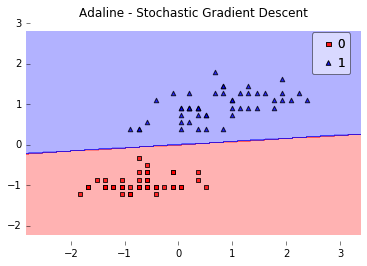

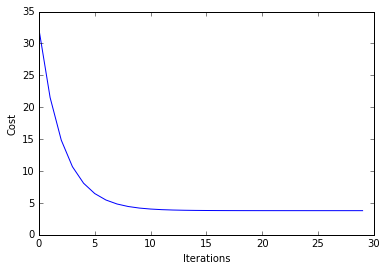

In [4]:
from mlxtend.data import iris_data
from mlxtend.evaluate import plot_decision_regions
from mlxtend.classifier import Adaline
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width
X = X[0:100] # class 0 and class 1
y = y[0:100] # class 0 and class 1

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


ada = Adaline(epochs=30, 
              eta=0.01, 
              minibatches=1, # for Gradient Descent Learning
              random_seed=1,
              print_progress=3)

ada.fit(X, y)
plot_decision_regions(X, y, clf=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.show()

plt.plot(range(len(ada.cost_)), ada.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')

### Example 3 - Stochastic Gradient Descent

Iteration: 15/15 | Cost 3.81 | Elapsed: 0:00:00 | ETA: 0:00:00

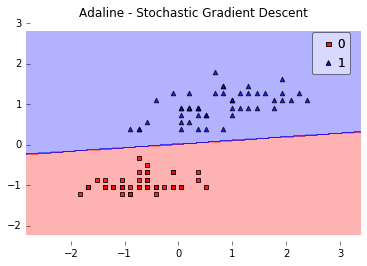

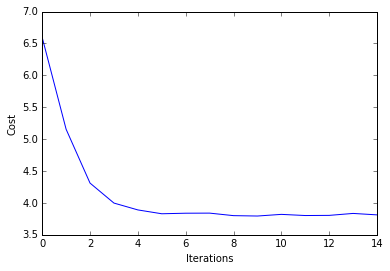

In [5]:
from mlxtend.data import iris_data
from mlxtend.evaluate import plot_decision_regions
from mlxtend.classifier import Adaline
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width
X = X[0:100] # class 0 and class 1
y = y[0:100] # class 0 and class 1

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


ada = Adaline(epochs=15, 
              eta=0.02, 
              minibatches=len(y), # for SGD learning 
              random_seed=1,
              print_progress=3)

ada.fit(X, y)
plot_decision_regions(X, y, clf=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.show()

plt.plot(range(len(ada.cost_)), ada.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### Example 4 - Stochastic Gradient Descent with Minibatches

Iteration: 15/15 | Cost 3.87 | Elapsed: 0:00:00 | ETA: 0:00:00

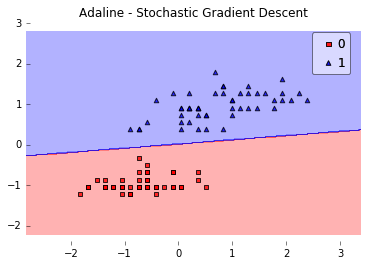

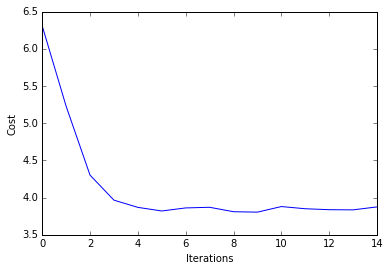

In [6]:
from mlxtend.data import iris_data
from mlxtend.evaluate import plot_decision_regions
from mlxtend.classifier import Adaline
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width
X = X[0:100] # class 0 and class 1
y = y[0:100] # class 0 and class 1

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


ada = Adaline(epochs=15, 
              eta=0.02, 
              minibatches=5, # for SGD learning w. minibatch size 20
              random_seed=1,
              print_progress=3)

ada.fit(X, y)
plot_decision_regions(X, y, clf=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.show()

plt.plot(range(len(ada.cost_)), ada.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## API

In [1]:
with open('../../api_modules/mlxtend.classifier/Adaline.md', 'r') as f:
    print(f.read())

## Adaline

*Adaline(eta=0.01, epochs=50, minibatches=None, random_seed=None, print_progress=0)*

ADAptive LInear NEuron classifier.

    Note that this implementation of Adaline expects binary class labels
    in {0, 1}.

**Parameters**

- `eta` : float (default: 0.01)

    solver rate (between 0.0 and 1.0)

- `epochs` : int (default: 50)

    Passes over the training dataset.
    Prior to each epoch, the dataset is shuffled
    if `minibatches > 1` to prevent cycles in stochastic gradient descent.

- `minibatches` : int (default: None)

    The number of minibatches for gradient-based optimization.
    If None: Normal Equations (closed-form solution)
    If 1: Gradient Descent learning
    If len(y): Stochastic Gradient Descent (SGD) online learning
    If 1 < minibatches < len(y): SGD Minibatch learning

- `random_seed` : int (default: None)

    Set random state for shuffling and initializing the weights.

- `print_progress` : int (default: 0)

    Prints progress in fitting to std